<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml06_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

농어(Perch)의 무게 예측

*   농어의 모든 특성들을 사용한 무게 예측
    *   Weight ~ Length + Diagonal + Height + Width
*   KNN Regressor과 Linear Regression 비교
*   다차항들을 포함하는 회귀
*   규제(Regularization)


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Fish 데이터셋

In [2]:
file_path = 'https://bit.ly/fish_csv_data'

In [3]:
fish = pd.read_csv(file_path)

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
perch = fish[fish.Species == 'Perch']

In [6]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [7]:
perch.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [8]:
perch.columns[2:]  # 배열 slicing

Index(['Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [9]:
x = perch[perch.columns[2:]].values  # 특성 배열

In [10]:
x.shape  #> (56, 4) = (n_samples, n_features)

(56, 4)

In [11]:
y = perch['Weight'].values  # 타겟 배열

In [12]:
y.shape  # (56,) = (n_samples,)

(56,)

## 훈련 셋, 테스트 셋 나누기

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=42)

In [14]:
x_train.shape

(42, 4)

In [15]:
x_test.shape

(14, 4)

In [16]:
y_train.shape

(42,)

In [17]:
y_test.shape

(14,)

In [18]:
x_train[:5]

array([[19.6   , 20.8   ,  5.1376,  3.0368],
       [22.    , 23.5   ,  5.875 ,  3.525 ],
       [18.7   , 19.4   ,  5.1992,  3.1234],
       [17.4   , 18.5   ,  4.588 ,  2.9415],
       [36.    , 38.3   , 10.6091,  6.7408]])

In [19]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

# 1차항만 포함하는 회귀

Weight ~ Length + Diagonal + Height + Width

## KNN

In [20]:
knn = KNeighborsRegressor()  # KNN 회귀 모델 생성

In [21]:
knn.fit(X=x_train, y=y_train)  # 모델 훈련

KNeighborsRegressor()

In [22]:
train_pred = knn.predict(X=x_train)  # 훈련 셋에서 예측값

In [23]:
train_pred

array([  87.6,  123. ,   79.6,   70.6,  723. ,  183.4,  847. ,  847. ,
       1020. ,  123. ,   95. ,  123. ,  174. ,  248. , 1043. ,  847. ,
        174. ,  122. ,  248. ,  847. ,  582. ,  224. ,  723. ,   60. ,
        142. ,   60. ,  685. ,  694.2,  248. ,  167. ,  847. ,  122. ,
        139. ,  123. , 1020. ,  136. ,   79.6,  685. ,  123. ,  193. ,
       1043. ,  659. ])

In [24]:
y_train  # 실젯값

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [25]:
test_pred = knn.predict(X=x_test)  # 테스트 셋에서의 예측값

In [26]:
test_pred

array([  60. ,   79.6,  248. ,  122. ,  130. ,  847. ,  311.4,  183.4,
        847. ,  118. , 1043. ,   60. ,  248. ,  248. ])

In [27]:
y_test

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

### KNN 모델 평가

In [28]:
# 훈련 셋의 MSE
mean_squared_error(y_true=y_train, y_pred=train_pred)

2986.5723809523806

In [29]:
# 테스트 셋의 MSE
mean_squared_error(y_test, test_pred)

837.3100000000001

KNN은 과소적합 - 테스트 셋의 성능이 훈련 셋의 성능보다 좋음.

In [30]:
# 훈련 셋의 결정계수(R2 score)
knn.score(X=x_train, y=y_train)

0.97579760182756

In [31]:
# 테스트 셋의 결정계수
knn.score(X=x_test, y=y_test)

0.9916579819676246

**TODO**

StandardScaler와 KNeighborsRegressor를 Pipeline을 연결한 모델을 생성, 훈련, 예측, 평가.

표준화를 하지 않았을 때와 비교.

## Linear Regression

$$
\hat{y} = w_0 + x_1 \times w_1 + x_2 \times w_2 + x_3 \times w_3 + x_4 \times w_4
$$

선형 회귀식에서 예측한 값들의 MSE가 최소가 되는 $w_0$ ~ $w_4$를 찾는 과정.

In [32]:
lin_reg = LinearRegression()  # 선형회귀 ML 모델 생성

In [33]:
lin_reg.fit(X=x_train, y=y_train)  # 모델 훈련

LinearRegression()

In [34]:
lin_reg.coef_

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [35]:
lin_reg.intercept_

np.float64(-610.0275364260515)

In [36]:
train_pred = lin_reg.predict(x_train)  # 훈련 셋 예측값
train_pred

array([  50.07831254,  149.63115115,   26.52323981,  -11.85322276,
        727.07849472,  216.11818851,  859.35210445,  894.24144157,
        883.76216601,  133.80604761,   30.46174313,  165.45625469,
        267.36647321,  302.42993565,  942.06583292,  859.73196835,
        209.15316045,  137.18128947,  294.64533152,  907.16858502,
        585.54863062,  292.8893912 ,  763.11655759, -149.53132283,
        163.94525857, -104.38889956,  718.95576629,  815.95759166,
        350.34538816,  195.07245372,  764.17125484,  130.77848264,
        116.61555757,  142.50754589,  959.21205119,  218.69399647,
         79.52715018,  737.86169572,  161.30274218,  243.72987423,
        939.22223984,  665.0680958 ])

In [37]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

### 선형 회귀 모델 평가

In [38]:
mean_squared_error(y_train, train_pred)  # 훈련 셋 MSE

5340.176566753986

In [39]:
lin_reg.score(x_train, y_train)  # 훈련 셋 결정계수

0.9567246116638569

In [40]:
lin_reg.score(x_test, y_test)  # 테스트 셋 결정계수

0.8790465615990273

선형회귀 모델은 과대적합 - 훈련 셋의 점수가 테스트 셋의 점수보다 높음.

선형회귀 모델이 KNN보다 성능이 나쁨.

# 2차항을 포함하는 회귀

## KNN

In [41]:
poly = PolynomialFeatures(include_bias=False)
# degree=2(기본값): 2차항까지 만듦.
# interaction_only=False(기본값): 모든 2차항을 만듦.
# include_bias=True(기본값): 편향(bias)를 포함.

In [42]:
# 표준화 변수 스케일링을 하는 전처리기 생성
scaler = StandardScaler()

In [43]:
# ML 모델 생성
knn = KNeighborsRegressor()

In [44]:
# 변환기 + 추정기 -> 파이프라인
pipe = Pipeline(steps=[('poly', poly),
                       ('scaler', scaler),
                       ('regressor', knn)])

In [45]:
# 모델 훈련
pipe.fit(X=x_train, y=y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', KNeighborsRegressor())])

In [46]:
x_train.shape

(42, 4)

In [47]:
pipe['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

Pipeline의 `fit` 동작:
1. PolynomialFeatures 객체에서 `fit_transform` -  2차항들이 포함.
1. StandardScaler 객체에서 `fit_transform` - 훈련 셋의 평균과 표준편차를 찾아서 스케일 변환.
1. KNeighborsRegressor 객체에서 `fit` - KNN 모델 훈련

In [48]:
train_pred = pipe.predict(X=x_train)

In [49]:
train_pred

array([  79.6,  130. ,   79.6,   79.6,  666.2,  183.4,  937. ,  937. ,
       1043. ,  123. ,   79.6,  130. ,  174. ,  248. , 1043. ,  917. ,
        158. ,  120. ,  248. ,  937. ,  632. ,  224. ,  666.2,   61. ,
        130. ,   61. ,  685. ,  789. ,  248. ,  158. ,  685. ,  122. ,
        132. ,  132. , 1043. ,  143. ,   88.6,  685. ,  130. ,  201. ,
       1013. ,  632. ])

In [50]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

### 2차항을 고려한 KNN 모델 평가

In [51]:
pipe.score(X=x_train, y=y_train)  # 훈련 셋 결정계수

0.9852536214139073

In [52]:
pipe.score(X=x_test, y=y_test)  # 테스트 셋 결정계수

0.9861441832656344

1차항들만 사용한 KNN보다 2차항까지 사용한 KNN이 훈련 셋 점수가 더 좋음.

1차항들만 사용한 KNN은 과소적합이 크게 나타났지만, 2차항까지 사용한 KNN은 과소적합이 거의 없음.

## 2차항을 포함하는 선형 회귀

In [53]:
# Pipeline 객체 생성
pipe = Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('regressor', LinearRegression())])

In [54]:
pipe.fit(X=x_train, y=y_train)  # 모델 훈련

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [55]:
pipe['poly'].get_feature_names_out()
#> 훈련 셋의 모양은 (42, 4). 2차항들이 포함된 훈련 셋은 (42, 14).

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [56]:
pipe['scaler'].mean_  #> 2차항들이 포함된 14개 특성의 평균.

array([ 28.4452381 ,  30.16190476,   8.04177619,   4.82055476,
       885.315     , 938.38357143, 253.47094833, 151.95621976,
       994.67714286, 268.66870714, 161.07007024,  72.92767419,
        43.6967156 ,  26.28532811])

In [57]:
pipe['scaler'].var_  #> 2차항들이 포함된 14개 특성의 분산.

array([7.61834297e+01, 8.49366440e+01, 8.25750989e+00, 3.04757990e+00,
       2.75397185e+05, 3.08435210e+05, 2.58699757e+04, 9.30438782e+03,
       3.45523937e+05, 2.89998592e+04, 1.04320051e+04, 2.45215466e+03,
       8.85262887e+02, 3.27854025e+02])

In [58]:
pipe['regressor'].coef_

array([   -443.26816038,    1150.91134799,    -650.22360319,
          -368.62831244,  115424.97558529, -210083.78541693,
        -49872.08633923,   29100.85132271,   91656.18352519,
         53699.90248991,  -27521.03052328,    1226.11352267,
         -5243.73927458,    2288.55011685])

In [59]:
pipe['regressor'].intercept_

np.float64(400.833333333325)

In [60]:
train_pred = pipe.predict(X=x_train)  # 훈련 셋 예측값
train_pred

array([  86.22462498,  117.8371985 ,   65.36623277,   51.32036181,
        688.61814191,  166.09437243,  880.6739519 ,  900.30918145,
        991.55155076,  111.61287566,  111.82615306,  126.79630184,
        203.74163857,  256.18282041, 1018.52857265,  889.87606203,
        151.71744742,  128.8552342 ,  262.18048814,  958.88194506,
        509.75756107,  209.09874055,  732.73599683,   63.71933794,
        126.00056859,   43.36490993,  648.48671444,  818.10553377,
        311.20892879,  143.06230598,  721.921373  ,   96.56262516,
        125.94007862,  142.94478702, 1050.25814685,  158.62005849,
         60.19799201,  683.20753036,  139.33275961,  226.26744371,
       1060.55561024,  595.45584151])

In [61]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [62]:
test_pred = pipe.predict(X=x_test)  # 테스트 셋 예측값
test_pred

array([  23.11093892,   16.86703258,  283.14558245,  126.83444969,
        121.43654058,  735.72232422,  321.38687695,  167.93520462,
        934.45200382,   93.33407336, 1221.49026679,   20.19532502,
        247.09413925,  243.72607029])

In [63]:
y_test

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

### 2차항을 포함한 선형회귀 모델 평가

In [64]:
pipe.score(X=x_train, y=y_train)  # 훈련 셋 결정계수

0.9920055538341164

In [65]:
pipe.score(X=x_test, y=y_test)  # 테스트 셋 결정계수

0.949260960155254

In [66]:
pipe['poly'].transform(x_test)

array([[8.40000000e+00, 8.80000000e+00, 2.11200000e+00, 1.40800000e+00,
        7.05600000e+01, 7.39200000e+01, 1.77408000e+01, 1.18272000e+01,
        7.74400000e+01, 1.85856000e+01, 1.23904000e+01, 4.46054400e+00,
        2.97369600e+00, 1.98246400e+00],
       [1.80000000e+01, 1.92000000e+01, 5.22240000e+00, 3.32160000e+00,
        3.24000000e+02, 3.45600000e+02, 9.40032000e+01, 5.97888000e+01,
        3.68640000e+02, 1.00270080e+02, 6.37747200e+01, 2.72734618e+01,
        1.73467238e+01, 1.10330266e+01],
       [2.75000000e+01, 2.89000000e+01, 7.28280000e+00, 4.56620000e+00,
        7.56250000e+02, 7.94750000e+02, 2.00277000e+02, 1.25570500e+02,
        8.35210000e+02, 2.10472920e+02, 1.31963180e+02, 5.30391758e+01,
        3.32547214e+01, 2.08501824e+01],
       [2.13000000e+01, 2.28000000e+01, 6.38400000e+00, 3.53400000e+00,
        4.53690000e+02, 4.85640000e+02, 1.35979200e+02, 7.52742000e+01,
        5.19840000e+02, 1.45555200e+02, 8.05752000e+01, 4.07554560e+01,
        2.256

# 규제의 필요성

*   선형회귀: Weight ~ Length
*   고차항들을 포함하는 선형회귀
    *   1차항: W ~ L
    *   2차항: W ~ L + L^2
    *   5차항: W ~ L + L^2 + L^3 + L^4 + L^5
    *   50차항: W ~ L + L^2 + ... + L^50
*   선형회귀 함수 시각화

In [70]:
x = perch[['Length']].values  # 특성 배열 - 2d array

In [71]:
x.shape

(56, 1)

In [72]:
y = perch['Weight'].values  # 타겟 배열 - 1d array

In [73]:
y.shape

(56,)

In [74]:
# 훈련 셋, 테스트 셋 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=42)

----- degree = 1 -----
훈련 셋 MSE = 7422.953552609778
테스트 셋 MSE = 17590.265977889165
----- degree = 2 -----
훈련 셋 MSE = 3617.9917403639633
테스트 셋 MSE = 2248.9974694392554
----- degree = 5 -----
훈련 셋 MSE = 3216.6113933040733
테스트 셋 MSE = 1753.0984158595472
----- degree = 50 -----
훈련 셋 MSE = 1242.3671485244474
테스트 셋 MSE = 7683897194550.778


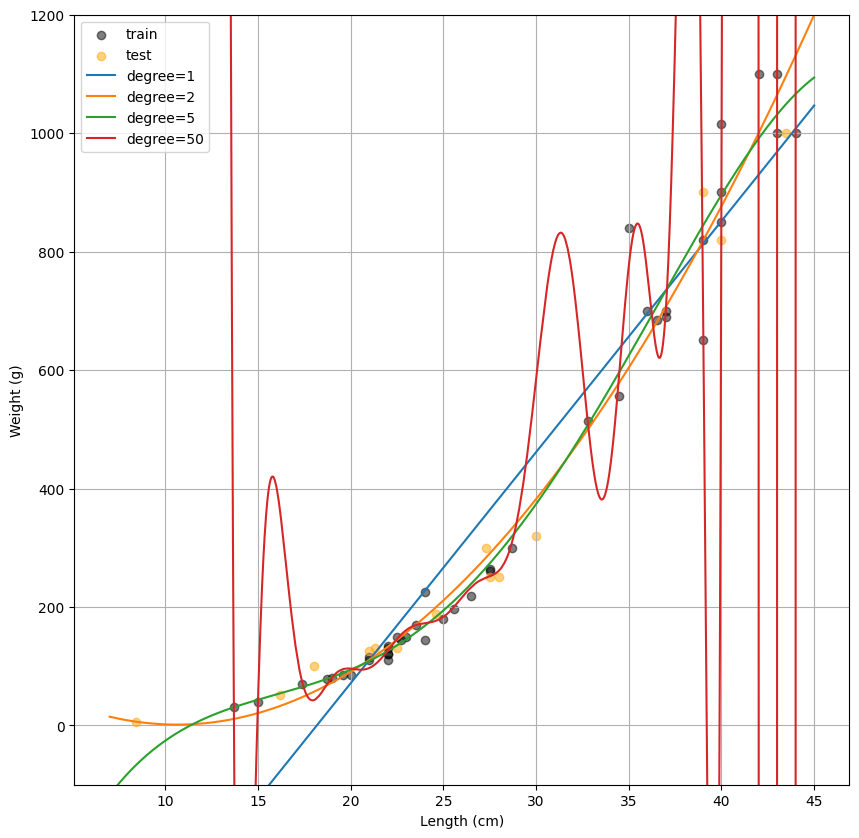

In [91]:
plt.figure(figsize=(10, 10))

# 훈련 셋 산점도
plt.scatter(x=x_train, y=y_train, color='black', alpha=0.5, label='train')

# 테스트 셋 산점도
plt.scatter(x=x_test, y=y_test, color='orange', alpha=0.5, label='test')

# 고차항들을 포함하는 선형회귀 방정식을 찾기 위해서
# PolynomialFeatures에서 사용할 degree(차수) 값들
degrees = (1, 2, 5, 50)
for d in degrees:
    # Pipeline 객체 생성
    pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=d, include_bias=False)),
                           ('scaler', StandardScaler()),
                           ('regressor', LinearRegression())])
    # 모델 훈련
    pipe.fit(X=x_train, y=y_train)

    # 훈련 셋, 테스트 셋의 MSE 출력
    print(f'----- degree = {d} -----')
    train_pred = pipe.predict(X=x_train)  # 훈련 셋 예측값
    train_mse = mean_squared_error(y_true=y_train, y_pred=train_pred)
    print('훈련 셋 MSE =', train_mse)
    test_pred = pipe.predict(X=x_test)  # 테스트 셋 예측값
    test_mse = mean_squared_error(y_true=y_test, y_pred=test_pred)
    print('테스트 셋 MSE =', test_mse)

    # 선형회귀 함수 시각화
    x_val = np.arange(7, 45, 0.0001).reshape((-1, 1))  # (n, 1) shape의 2d array
    y_val = pipe.predict(X=x_val)
    plt.plot(x_val, y_val, label=f'degree={d}')

plt.legend()
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.ylim((-100, 1200))
plt.show()

차수가 높아질 수록 선형회귀 함수는 훈련 셋에 더 많이 과대적합(over-fitting)되는 모습을 볼 수 있음.

과대적합이 커지면 훈련 셋에서는 오차가 적을지라도, 훈련되지 않은 데이터들은 오차가 매우 클 수 있음. 일반화 성능이 떨어짐.

과대적합의 크기를 줄일 수 있는 방법을 고려 -> 규제(regularization)

# 규제(Regularization)


*   머신 러닝의 목적은 비용 함수(cost function)/손실 함수(loss function)을 최소화하는 것.


*   선형 회귀(linear regression)의 목적은 MSE(mean squared errors)를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것. 즉, 선형 회귀의 비용 함수는 $ MSE(w) $ .
$$
J(w) = MSE(w)
     = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2
     = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + \sum_{j=1}^{m} x_{ij} \cdot w_{j}))^2
$$
    *   $N$: 샘플의 개수(특성 행렬의 row의 개수)
    *   $m$: 특성의 개수(특성 행렬의 column의 개수)
    *   $y_i$: $i$번째 샘플의 실젯값
    *   $\hat{y_i}$: $i$번째 샘플의 예측값
    *   $x_{ij}$: $i$번째 샘플의 $j$번째 특성 값
    *   $w_j$: $j$번째 특성에 곱해주는 계수(기울기)

*   Ridge(`l2`) 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + \dfrac{\alpha}{2} \mid\mid w \mid\mid ^2
$$

> Ridge 규제의 효과는 고차항들의 계수(coefficients, 기울기)를 작게 만들어서 곡선의 기울기를 완만하게 만들어 주게 됨. overfitting(과대적합)을 줄여주게 됨.

*   Lasso(`l1`) 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + \alpha \mid\mid w \mid\mid
$$

> Lasso 규제는 중요하지 않은 고차항들의 계수를 0으로 만들어 줌으로써, 곡선을 완만하게 만들어 주는 효과가 생김. 과대적합을 줄여주는 효과.

*   ElasticNet 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + r \alpha \mid\mid w \mid\mid
              + \dfrac{1 - r}{2} \alpha \mid\mid w \mid\mid ^2
$$

> ElasticNet은 Ridge 규제와 Lasso 규제의 효과를 모두 가지고 있음.

*   Ridge, Lasso에서 $\alpha$ 값이 크면 규제가 강해지고, $\alpha$ 값이 작으면 규제가 약해짐($ \alpha \ge 0 $).
*   ElasticNet에서 $\alpha$는 규제의 크기를 의미하고, $r$은 `l1` 규제의 비율($0 \le r \le 1$)을 의미함.
